<a href="https://colab.research.google.com/github/mohdbilal14/Walmart-Confidence-Interval-CLT/blob/main/Walmart_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import kstest
import statsmodels.api as sm

# Importing Date & Time util modules
from dateutil.parser import parse

import statistics


In [ ]:
#convert data into dataframe

walmart_df = pd.read_csv('walmart_data.csv')
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df = walmart_df.copy()
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
#change the datatype into category

for i in df.columns[:-1]:
  df[i] = df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


#Insight:

The purchase amount vary widely with minimun amount is $12 amd maximum amount is $23961. Median amount is 8047 and Mean amount is 9263 when compared with median it is lower than the average.

#Statistical Summary

In [ ]:
df.describe(include='category').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


#Insight:

Out of 550068, User_ID has 5891 and Product_ID has 3631 unique values.

In Age, 26-35 age group has maximum transaction.

In city, B category has maximum transaction.

In Marital_status, 59% of total transacion were done by unmarried customers and 41% by Married customers



In [ ]:
df.duplicated().value_counts()

False    550068
Name: count, dtype: int64

#Outlier Detection

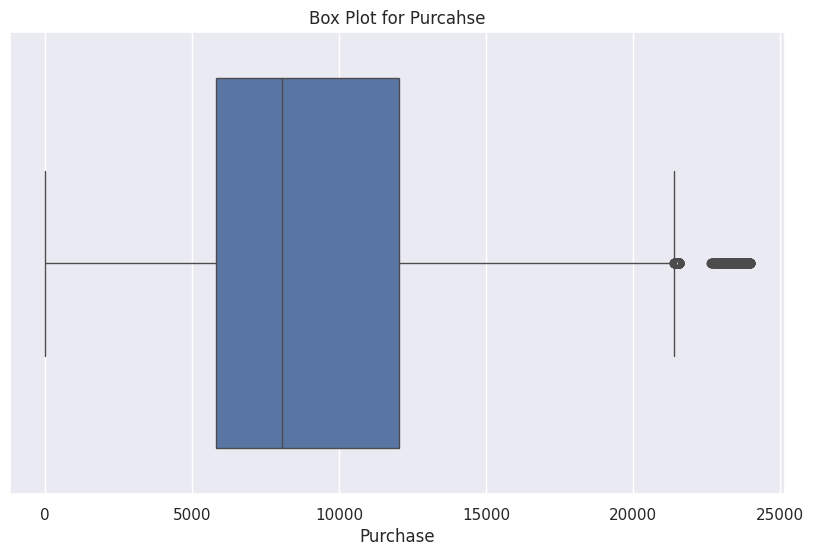

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Purchase',data=df)
plt.title('Box Plot for Purcahse')
plt.show()

#Insight:

Observation from the above graph, outliers are there

#Calculating quartiles and IQR


In [ ]:
Q1 = np.percentile(df['Purchase'], 25)
Q3 = np.percentile(df['Purchase'], 75)
IQR = Q3 - Q1

# Upper and lower bounds for outliers
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# Outliers in the specified column
upper_outliers_df = df[df['Purchase'] > upper_bound]
lower_outliers_df = df[df['Purchase'] < lower_bound]

# Count of outliers
upper_count = len(upper_outliers_df)
lower_count = len(lower_outliers_df)

total_count = upper_count + lower_count

print(f"upper count :{upper_count}")
print(f"lower count :{lower_count}")
print(f"total count :{total_count}")

upper count :2677
lower count :0
total count :2677


#Insight:

Most of the outliers is greater than the upper bound from the above metrics

In [ ]:
outliers_df = df[df['Purchase'] > upper_bound]
outliers_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


#Handling Outlier Detection

In [ ]:
clipped_data = np.clip(df['Purchase'], lower_bound, upper_bound)


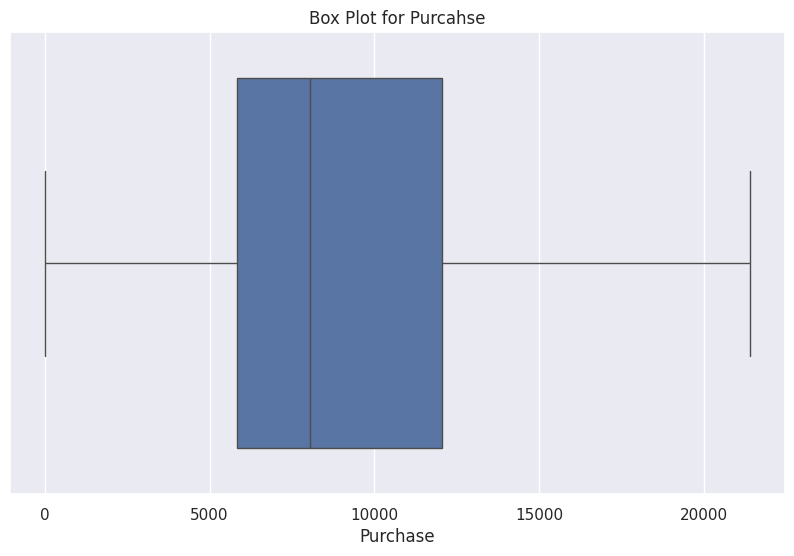

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(x=clipped_data)
plt.title('Box Plot for Purcahse')
plt.show()

In [ ]:
#Marital status (0,1) to category labels

df['Marital_status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'single')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Marital_status
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,single
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,single
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,single
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,single
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,single


In [ ]:
df.drop(columns={'Marital_Status'},inplace=True)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category,Purchase,Marital_status
0,1000001,P00069042,F,0-17,10,A,2,3,8370,single
1,1000001,P00248942,F,0-17,10,A,2,1,15200,single
2,1000001,P00087842,F,0-17,10,A,2,12,1422,single
3,1000001,P00085442,F,0-17,10,A,2,12,1057,single
4,1000002,P00285442,M,55+,16,C,4+,8,7969,single


#Univariate Analysis

Gender Analysis

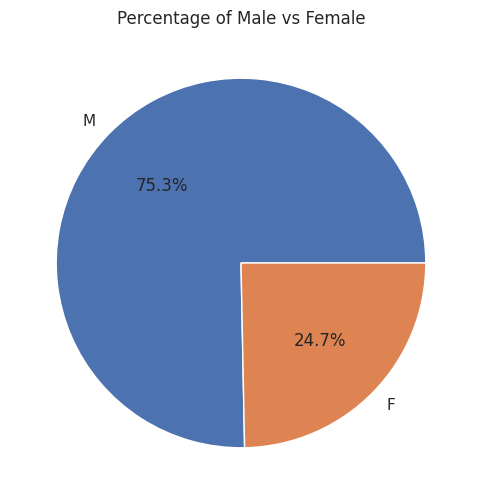

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Percentage of Male vs Female")
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

#Marital Analysis

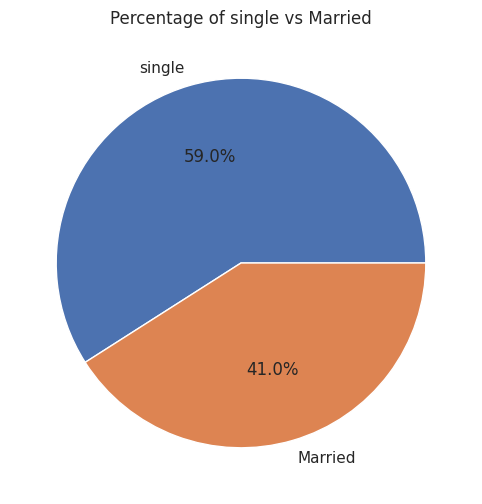

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Percentage of single vs Married")
plt.pie(df['Marital_status'].value_counts(),labels=df['Marital_status'].value_counts().index,autopct='%1.1f%%')
plt.show()

#Age Analysis

In [ ]:
table = df.groupby(['Age']).size().reset_index()
table.columns = ['Age','Counts']
table['percentage'] = table['Counts']/sum(table['Counts'])*100
table['Percent'] = round(table['percentage'],1).astype(str) + '%'
table

,Age,Counts,percentage,Percent
0,0-17,15102,2.745479,2.7%
1,18-25,99660,18.117760,18.1%
2,26-35,219587,39.919974,39.9%
3,36-45,110013,19.999891,20.0%
4,46-50,45701,8.308246,8.3%
5,51-55,38501,6.999316,7.0%
6,55+,21504,3.909335,3.9%


Text(0.5, 1.0, 'Age Analysis')

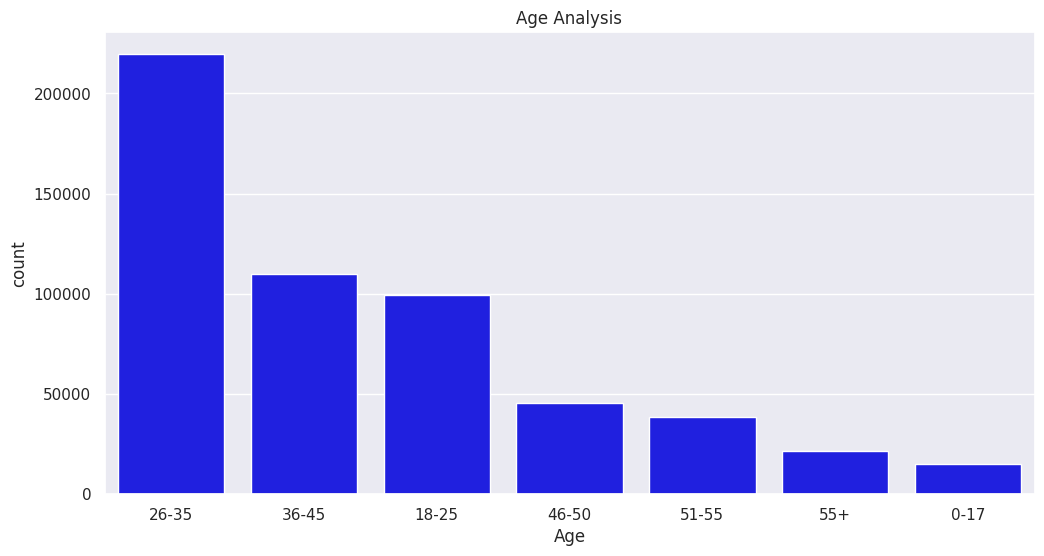

In [ ]:
plt.figure(figsize=(12,6))
Age_Count = sns.countplot(x='Age',data=df,order=df['Age'].value_counts().index,color = 'blue')
Age_Count
plt.title('Age Analysis')

#Insight:

26-35 age group has maximum number of count indicating the customer in this range makes the most purchase and it is followed by 36-45 and 18-25

#Occupation Analysis

In [ ]:
Occupation_table = df.groupby(['Occupation']).size().reset_index()
Occupation_table.columns = ['Occupation','Counts']
Occupation_table['percentage'] = Occupation_table['Counts']/sum(Occupation_table['Counts'])*100
Occupation_table['Percent'] = round(Occupation_table['percentage'],1).astype(str) + '%'
Occupation_table

,Occupation,Counts,percentage,Percent
0,0,69638,12.659889,12.7%
1,1,47426,8.621843,8.6%
2,2,26588,4.833584,4.8%
3,3,17650,3.208694,3.2%
4,4,72308,13.145284,13.1%
5,5,12177,2.213726,2.2%
6,6,20355,3.700452,3.7%
7,7,59133,10.750125,10.8%
8,8,1546,0.281056,0.3%
9,9,6291,1.143677,1.1%


Text(0.5, 1.0, 'Occupation Analysis')

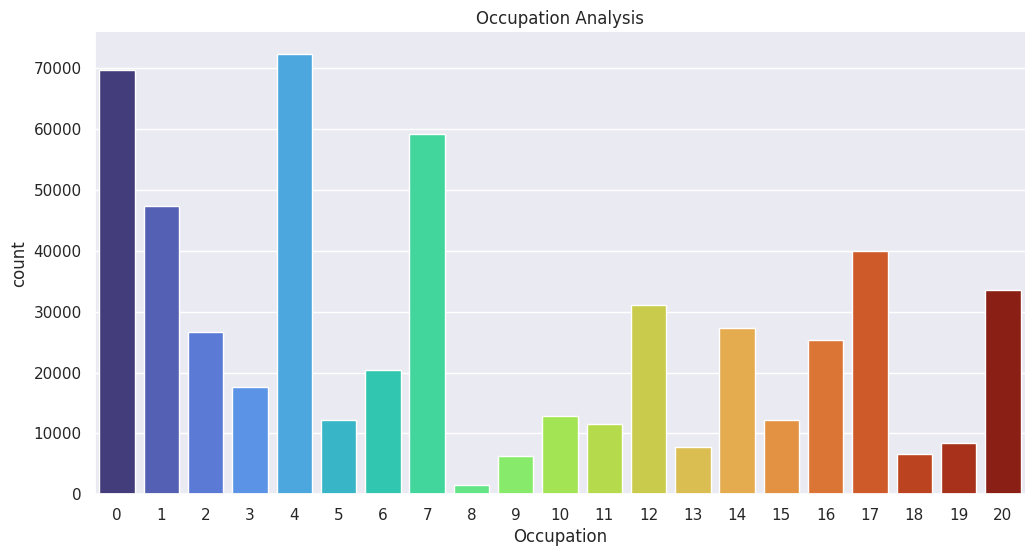

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Occupation', hue='Occupation', palette='turbo', legend=False)
sns.despine()
plt.title('Occupation Analysis')

#Insight:

Occupation 4 category has almost high number of counts and 0,7,1 also significance counts

#City category Analysis

In [ ]:
city_table = df.groupby(['City_Category']).size().reset_index()
city_table.columns = ['City_Category','Counts']
city_table['percentage'] = city_table['Counts']/sum(city_table['Counts'])*100
city_table['Percent'] = round(city_table['percentage'],1).astype(str) + '%'
city_table

,City_Category,Counts,percentage,Percent
0,A,147720,26.854862,26.9%
1,B,231173,42.026259,42.0%
2,C,171175,31.118880,31.1%


Text(0.5, 1.0, 'City_Category Analysis')

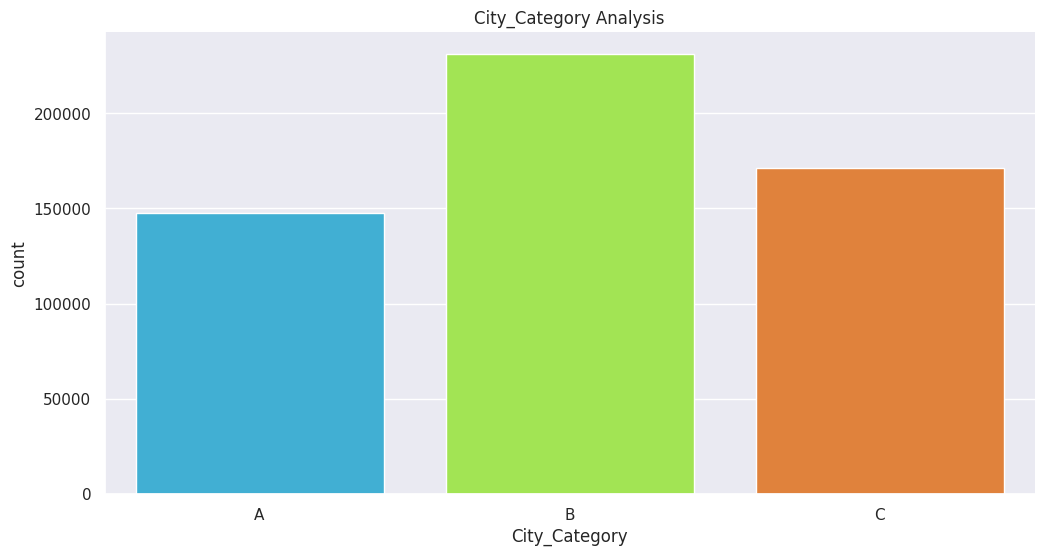

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='City_Category', hue='City_Category', palette='turbo', legend=False)
sns.despine()
plt.title('City_Category Analysis')

#Insight:

Observed from the above graph, 'B' City category has 42% of transactions indicating customers from this city makes the most purchases.

#Stay_In_Current_City_Years Analysis

In [ ]:
stay_city_table = df.groupby(['Stay_In_Current_City_Years']).size().reset_index()
stay_city_table.columns = ['Stay_In_Current_City_Years','Counts']
stay_city_table['percentage'] = stay_city_table['Counts']/sum(stay_city_table['Counts'])*100
stay_city_table['Percent'] = round(stay_city_table['percentage'],1).astype(str) + '%'
stay_city_table

,Stay_In_Current_City_Years,Counts,percentage,Percent
0,0,74398,13.525237,13.5%
1,1,193821,35.235825,35.2%
2,2,101838,18.513711,18.5%
3,3,95285,17.322404,17.3%
4,4+,84726,15.402823,15.4%


Text(0.5, 1.0, 'Stay_In_Current_City_Years Analysis')

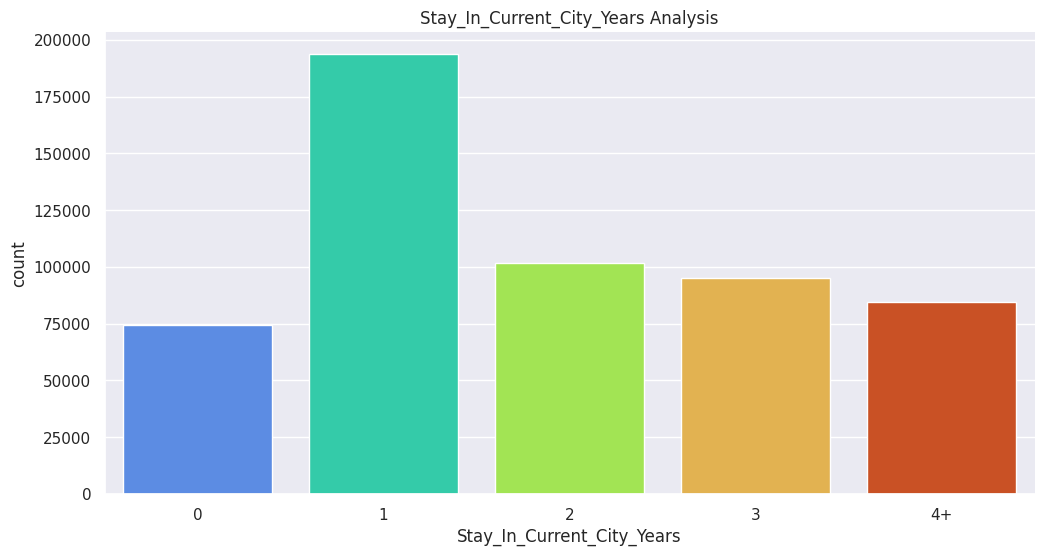

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Stay_In_Current_City_Years', hue='Stay_In_Current_City_Years', palette='turbo', legend=False)
sns.despine()
plt.title('Stay_In_Current_City_Years Analysis')

#Insight:

Observed from the graph, Customers who have stayed in their current city for more than 1 year show a higher purchase tendency, suggesting a positive correlation between the duration of stay and purchasing behavior.

#Product_Category Analysis

In [ ]:
product_table = df.groupby(['Product_Category']).size().reset_index()
product_table.columns = ['Product_Category','Counts']
product_table['percentage'] = product_table['Counts']/sum(product_table['Counts'])*100
product_table['Percent'] = round(product_table['percentage'],1).astype(str) + '%'
product_table

,Product_Category,Counts,percentage,Percent
0,1,140378,25.520118,25.5%
1,2,23864,4.338373,4.3%
2,3,20213,3.674637,3.7%
3,4,11753,2.136645,2.1%
4,5,150933,27.438971,27.4%
5,6,20466,3.720631,3.7%
6,7,3721,0.676462,0.7%
7,8,113925,20.711076,20.7%
8,9,410,0.074536,0.1%
9,10,5125,0.931703,0.9%


Text(0.5, 1.0, 'Product_Category Analysis')

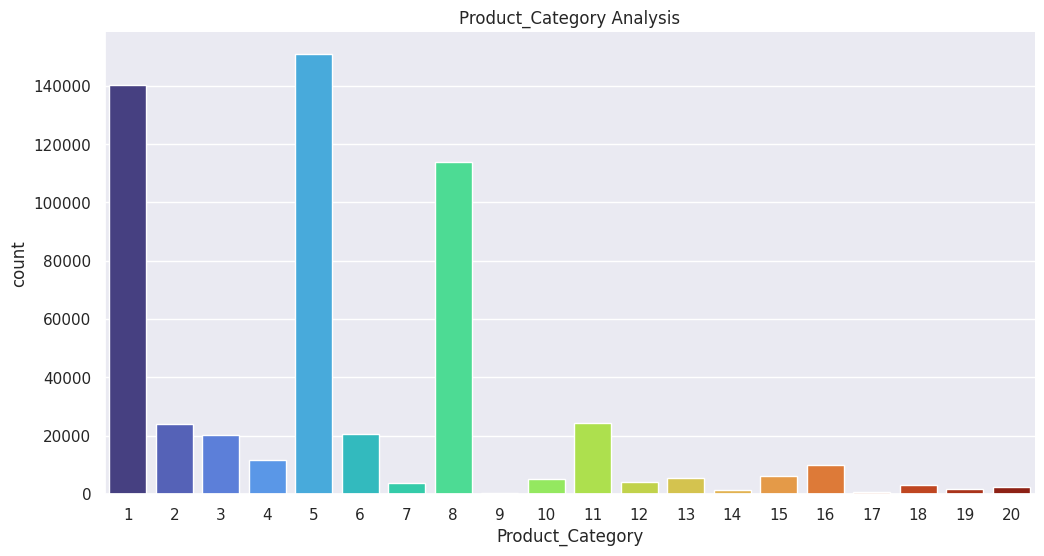

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Product_Category', hue='Product_Category', palette='turbo', legend=False)
sns.despine()
plt.title('Product_Category Analysis')

#Insight:

Product Category 1,5,8 has high number of transaction

 1 - 25% ,
 5 - 27% ,
 8 - 20%

 indicates these categories contibute significantly to the overall sales revenue.

#Bivariate Analysis

#Distribution of Age by Gender

In [ ]:
pivot = lambda index: df.pivot_table(index=df[index], columns='Gender', aggfunc='size', fill_value=0)

In [ ]:
pivot('Age')

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


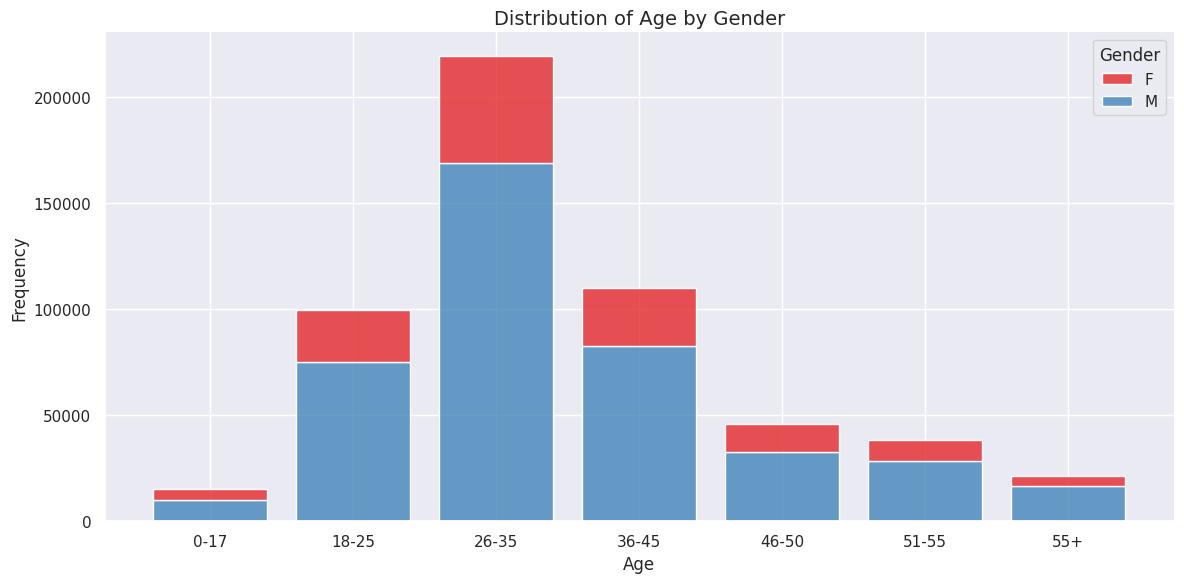

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df, x='Age', hue='Gender', palette='Set1', legend=True, multiple='stack', shrink=0.8)
sns.despine()

# Set labels and titlein
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of Age by Gender', fontsize=14, fontfamily='sans-serif')

plt.tight_layout()

plt.show()

#Insight:

Among the various age group, Males have high number of purchases compared to Females with the age group of 26-35.

#Distribution of Occupation by Gender

In [ ]:
pivot('Occupation')

Gender,F,M
Occupation,,
0,18112,51526
1,17984,29442
2,8629,17959
3,7919,9731
4,17836,54472
5,2220,9957
6,8160,12195
7,10028,49105
8,361,1185


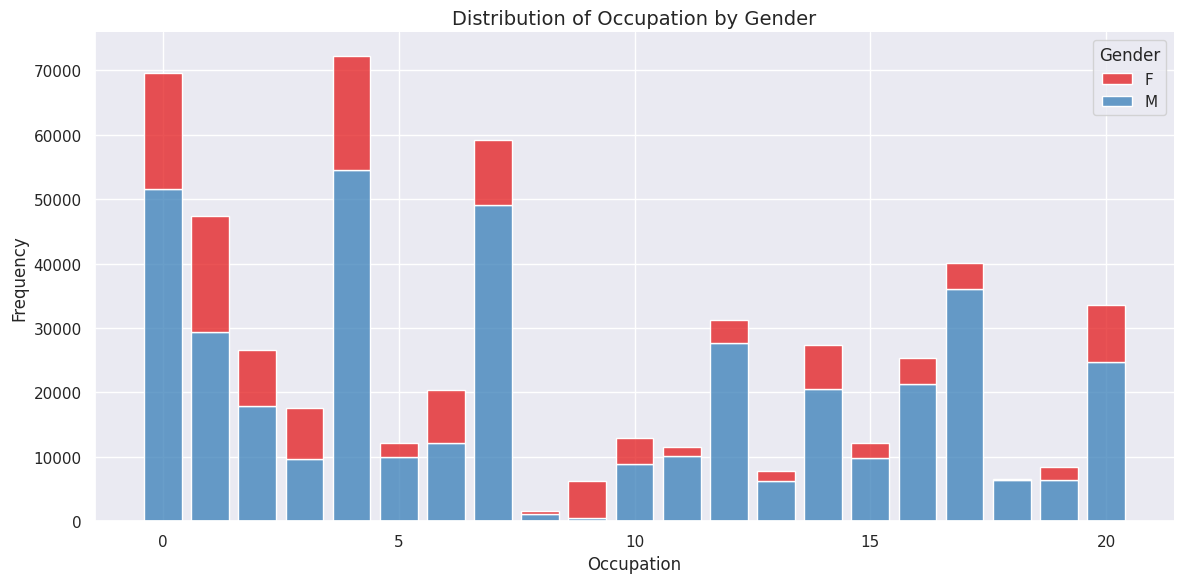

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Occupation', hue='Gender', palette='Set1', legend=True, multiple='stack', shrink=0.8)
sns.despine()

# Set labels and title
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of Occupation by Gender', fontsize=14, fontfamily='sans-serif')

plt.tight_layout()

plt.show()

#Insight:

Occupation 0 and 4 has highest number of counts, suggesting that individuals in these occupation contribute high in the overall sales. Occupation 4 is higher purchase count.

#Distribution of city_category by Gender

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category,Purchase,Marital_status
0,1000001,P00069042,F,0-17,10,A,2,3,8370,single
1,1000001,P00248942,F,0-17,10,A,2,1,15200,single
2,1000001,P00087842,F,0-17,10,A,2,12,1422,single
3,1000001,P00085442,F,0-17,10,A,2,12,1057,single
4,1000002,P00285442,M,55+,16,C,4+,8,7969,single


In [ ]:
pivot('City_Category')

Gender,F,M
City_Category,,
A,35704,112016
B,57796,173377
C,42309,128866


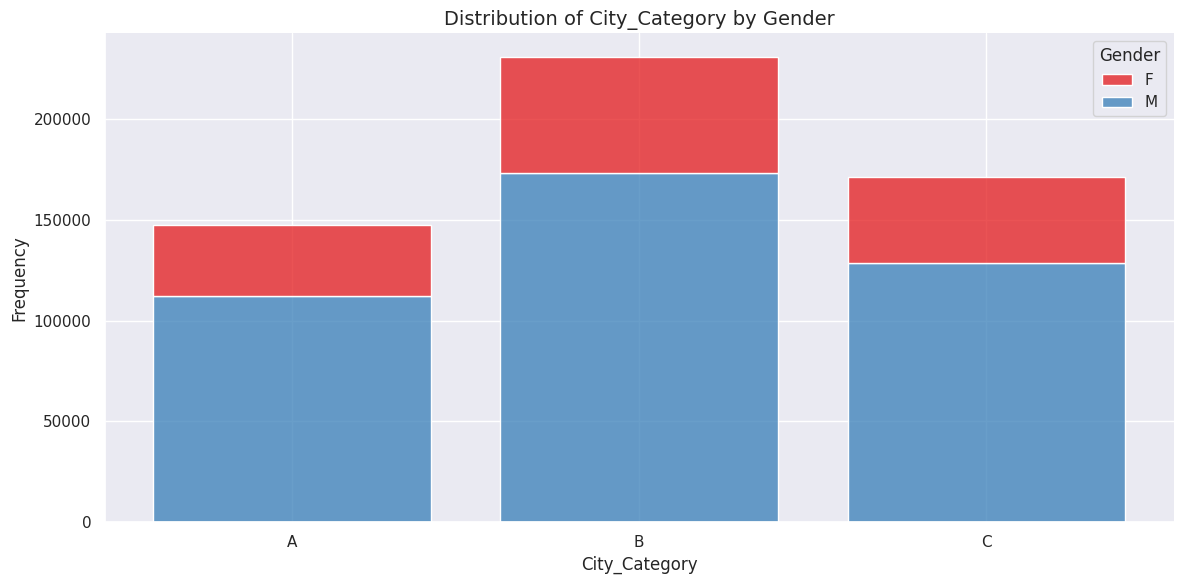

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='City_Category', hue='Gender', palette='Set1', legend=True, multiple='stack', shrink=0.8)
sns.despine()

# Set labels and title
plt.xlabel('City_Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of City_Category by Gender', fontsize=14, fontfamily='sans-serif')

plt.tight_layout()

plt.show()

#Insight:

In city-category 'B' Males has higher number of purchases compared to Females. 'B' city category has highest purchase count compared with 'A' and 'C'.

In [ ]:
pivot('Stay_In_Current_City_Years')

Gender,F,M
Stay_In_Current_City_Years,,
0,17063,57335
1,51298,142523
2,24332,77506
3,24520,70765
4+,18596,66130


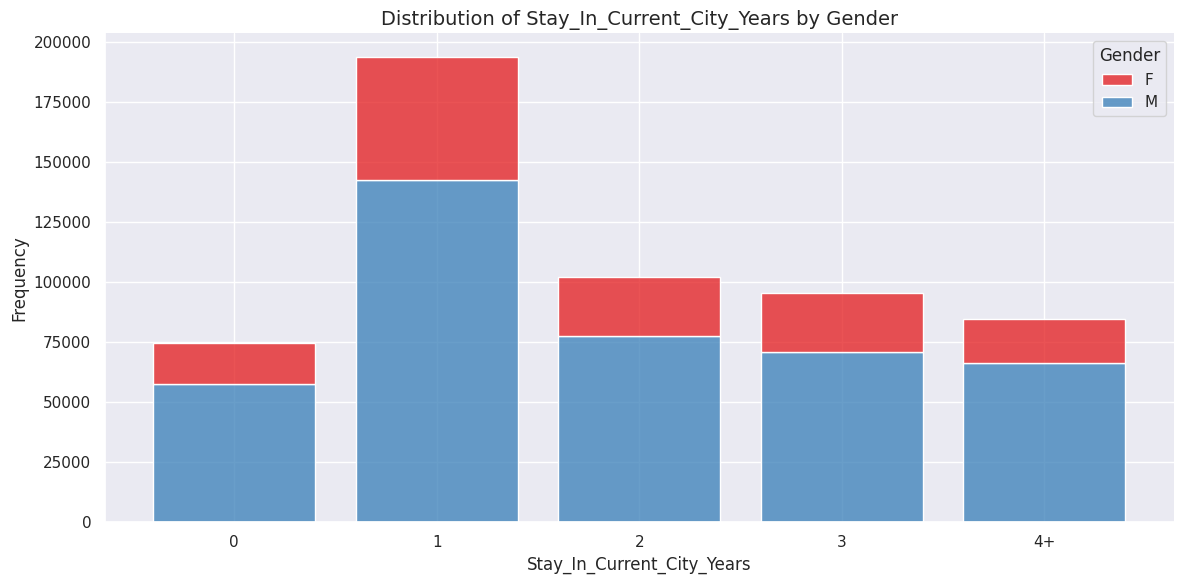

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Stay_In_Current_City_Years', hue='Gender', palette='Set1', legend=True, multiple='stack', shrink=0.8)
sns.despine()

# Set labels and title
plt.xlabel('Stay_In_Current_City_Years', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of Stay_In_Current_City_Years by Gender', fontsize=14, fontfamily='sans-serif')

plt.tight_layout()

plt.show()

#Insight:

Customers who have stayed in their current city for 1 year has highest purchase counts compared with others. Male is leading to make purchases compared to Females.

In [ ]:
pivot('Product_Category')


Gender,F,M
Product_Category,,
1,24831,115547
2,5658,18206
3,6006,14207
4,3639,8114
5,41961,108972
6,4559,15907
7,943,2778
8,33558,80367
9,70,340


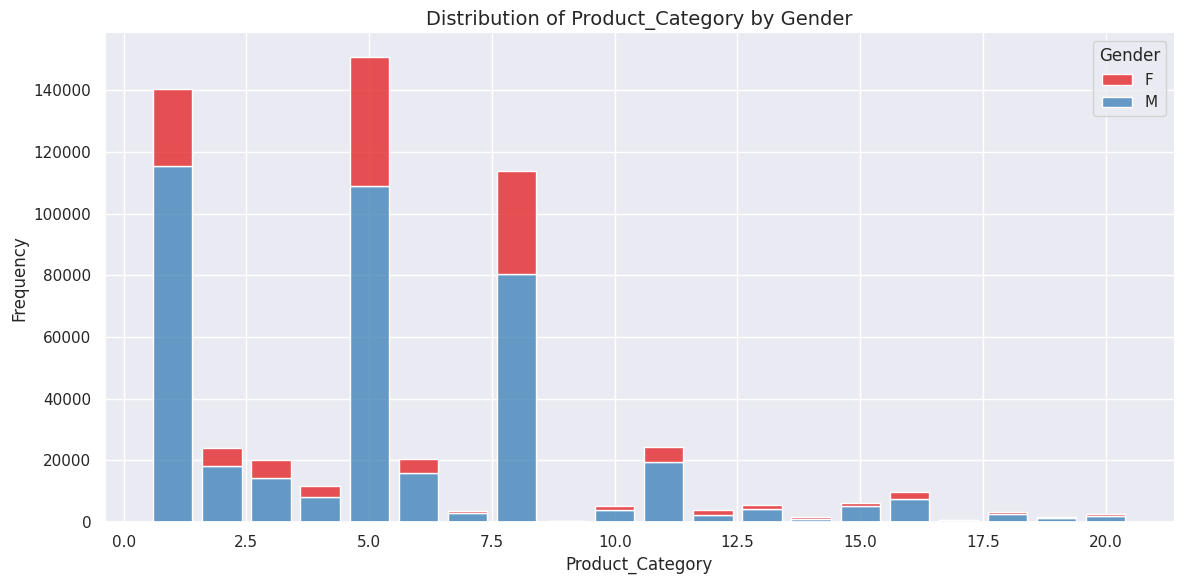

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Product_Category', hue='Gender', palette='Set1', legend=True, multiple='stack', shrink=0.8)
sns.despine()

# Set labels and title
plt.xlabel('Product_Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of Product_Category by Gender', fontsize=14, fontfamily='sans-serif')

plt.tight_layout()

plt.show()

#Insight:

Product category '5' has highest purchase count and also Product category '1' and '8' notable purachse count

In [ ]:
pivot('Marital_status')

Gender,F,M
Marital_status,,
single,78821,245910
Married,56988,168349


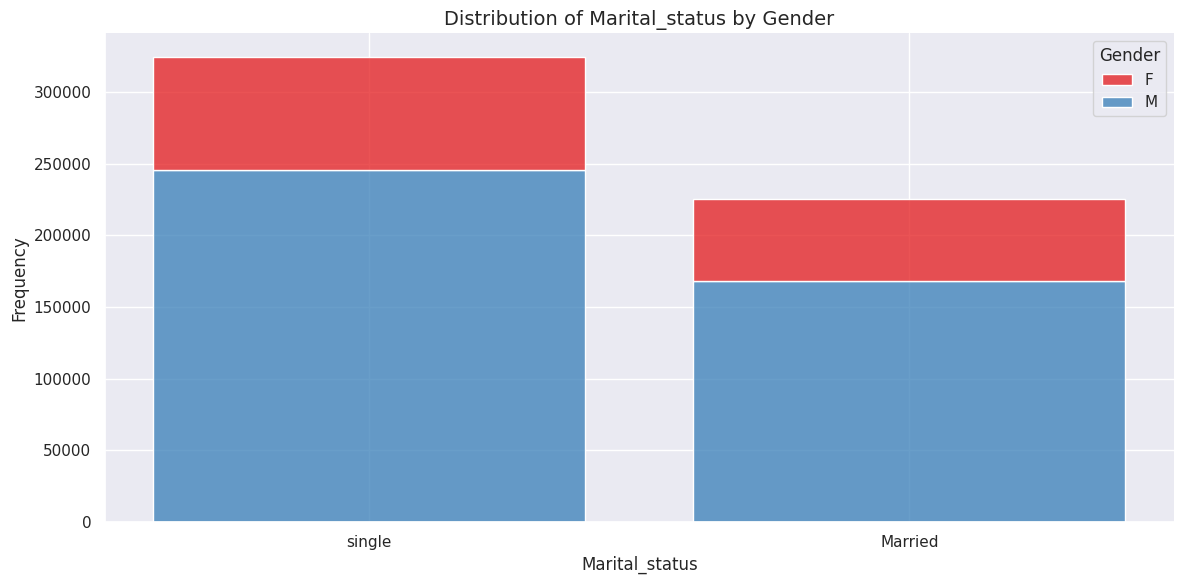

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Marital_status', hue='Gender', palette='Set1', legend=True, multiple='stack', shrink=0.8)
sns.despine()

# Set labels and title
plt.xlabel('Marital_status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of Marital_status by Gender', fontsize=14, fontfamily='sans-serif')

plt.tight_layout()

plt.show()

#Insight:

Singles has highest purchase count compared with Married customers. Singles contributing more to overall sales.

#Black Friday Sales Analysis on Gender

In [ ]:
avg_purchase = df.groupby('Gender')['Purchase'].mean().reset_index()
avg_purchase

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


In [ ]:
df_male = df[df['Gender'] == 'M']
df_female = df[df['Gender'] == 'F']
print(f'Male customers - {len(df_male)}')
print(f'Female customers - {len(df_female)}')

Male customers - 414259
Female customers - 135809


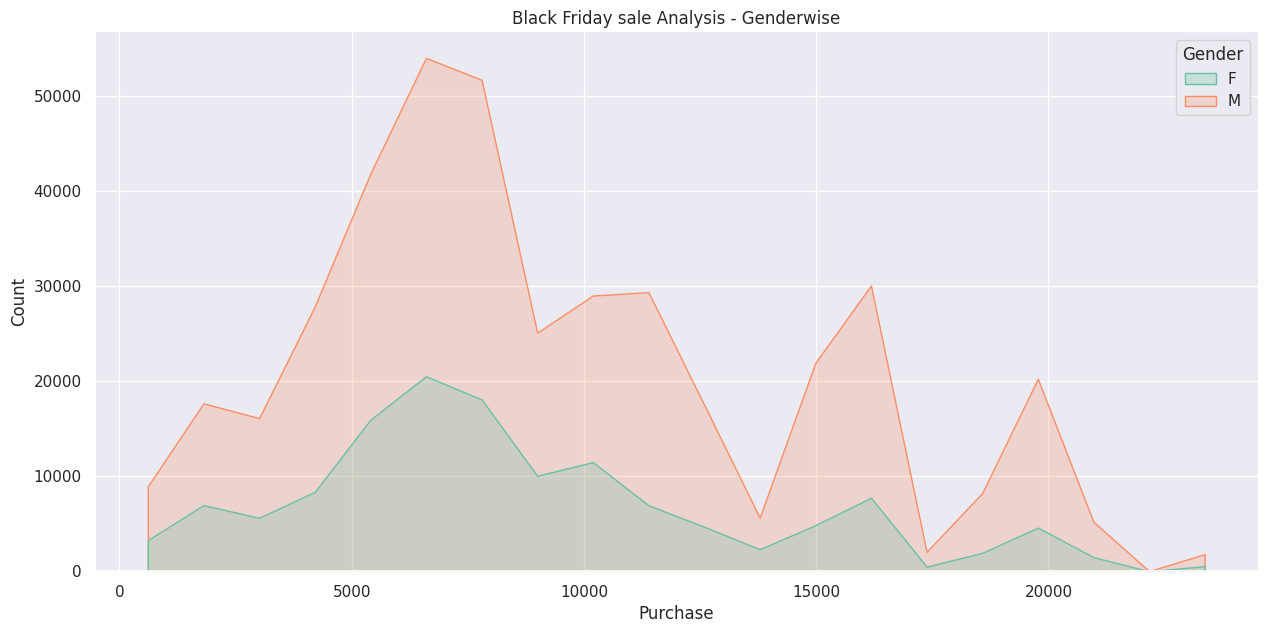

In [ ]:
plt.figure(figsize=(15,7))
sns.set(style='darkgrid')
sns.histplot(data=df, x = "Purchase", bins=20, hue = "Gender",element='poly',palette= 'Set2')
sns.despine()
plt.title('Black Friday sale Analysis - Genderwise')
plt.show()

In [ ]:
df.groupby('Gender')['Purchase'].describe().T.round(2)

Gender,F,M
count,135809.00,414259.00
mean,8734.57,9437.53
std,4767.23,5092.19
min,12.00,12.00
25%,5433.00,5863.00
50%,7914.00,8098.00
75%,11400.00,12454.00
max,23959.00,23961.00


#Insight:

Total number of female customers is less compared to male customers.

Average customer purchase for male is higher compared with female customers.

Observed from the above data, With a larger male customer base, it is likely that men will make more purchases compared to females.



#Calculate 95% Confiddence Interval on Entire dataset

In [ ]:
def data_con_interval(data, variable, category, confidence_level=0.95):

    category_data = data[data[variable] == category]['Purchase']
    category_mean = category_data.mean()
    category_std = category_data.std()

    # standard error of the mean
    category_sem = category_std / np.sqrt(len(category_data))

    # margin of error
    category_moe = category_sem * norm.ppf((1 + confidence_level) / 2)

    # confidence interval
    category_ci = (category_mean - category_moe, category_mean + category_moe)

    # width
    category_width = category_ci[1] - category_ci[0]

    print(f'{category} 95% confidence interval: {category_ci}')
    print(f'{category} Width: {category_width}')

#95% Confidence Interval on Entire Dataset

In [ ]:
data_con_interval(df,'Gender','M')

M 95% confidence interval: (9422.01944736257, 9453.032633581959)
M Width: 31.013186219388444


In [ ]:
data_con_interval(df,'Gender','F')

F 95% confidence interval: (8709.21154714068, 8759.919983170272)
F Width: 50.70843602959212


#Insight:

Evaluated the confidence Interval on entire dataset is wider for males compared to females indicated higher amount spent by males.



#Calculate 95% confidence Interval on Sample dataset

In [ ]:
def sample_ci(data, variable, category, sample_size):

    category_data = data[data[variable] == category]['Purchase']
    sample_data = category_data.sample(n=sample_size, random_state=42)
    mean_val = sample_data.mean()
    std_dev = sample_data.std()

    # standard error of the mean
    sem = std_dev / np.sqrt(sample_size)

    # margin of error
    moe = sem * norm.ppf((1 + 0.95) / 2)  # 1.96 corresponds to the Z-score for a 95% confidence interval

    # confidence interval
    ci = (mean_val - moe, mean_val + moe)

    category_width = ci[1] - ci[0]

    print(f"\nSample Size: {sample_size}")
    print(f'{category} 95% confidence interval: {ci}')
    print(f'{category} Width: {category_width}')

#Calculate confidence Interval of 300 samples

In [ ]:
sample_ci(df, 'Gender', 'M', 300)


Sample Size: 300
M 95% confidence interval: (9283.731565877591, 10491.715100789075)
M Width: 1207.9835349114837


In [ ]:
sample_ci(df, 'Gender', 'F', 300)


Sample Size: 300
F 95% confidence interval: (8308.865304074718, 9426.034695925284)
F Width: 1117.1693918505662


#Calculate confidence Interval of 3000 samples

In [ ]:
sample_ci(df, 'Gender', 'M', 3000)


Sample Size: 3000
M 95% confidence interval: (9460.10182838994, 9831.170171610062)
M Width: 371.0683432201222


In [ ]:
sample_ci(df, 'Gender', 'F', 3000)


Sample Size: 3000
F 95% confidence interval: (8630.48138780842, 8982.545945524911)
F Width: 352.0645577164905


#Calculate confidence Interval of 30000 samples

In [ ]:
sample_ci(df, 'Gender', 'M', 30000)


Sample Size: 30000
M 95% confidence interval: (9428.950211018666, 9544.881322314668)
M Width: 115.9311112960022


In [ ]:
sample_ci(df, 'Gender', 'F', 30000)


Sample Size: 30000
F 95% confidence interval: (8602.340431075772, 8709.62250225756)
F Width: 107.28207118178761


#Insight:

The width of the confidence interval is inversely affected by the sample size; as the sample size increases, the interval becomes narrower, providing more precise estimates.

confidence Interval for different sample size overlap and the observed difference may not be statiscally significant.

Larger smaple size result in normally shaped distribution of mean.

#CLT analysis based on Gender

In [ ]:
male_df = df[df['Gender']=='M']
female_df = df[df['Gender']=='F']

In [ ]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

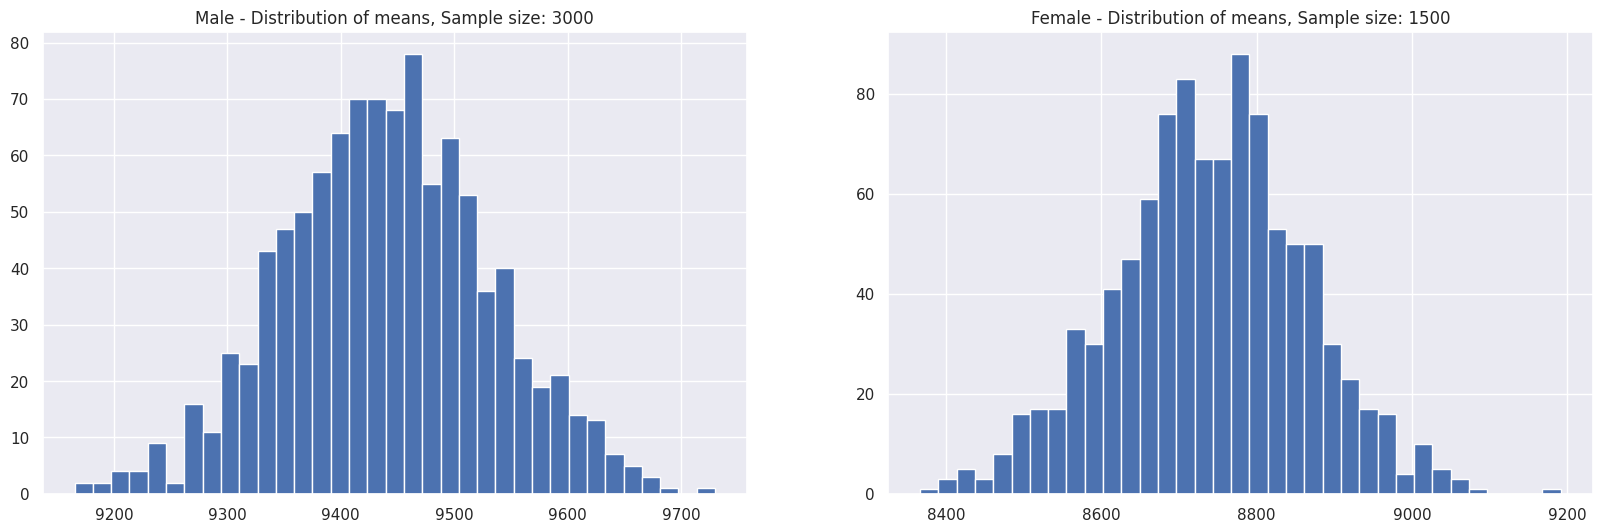

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 9440.09
Population mean - Mean of sample means of amount spend for Female: 8740.24

Male - Sample mean: 9437.53 Sample std: 5092.19
Female - Sample mean: 8734.57 Sample std: 4767.23


In [ ]:
male_avg = df[df['Gender']=='M']['Purchase'].mean()
female_avg = df[df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 9437.53
Average amount spend by Female customers: 8734.57


#Insight:

#Average amount spend by Male customers: 9437.53
#Average amount spend by Female customers: 8734.57

#90% confidence Interval

In [ ]:
male_margin_of_error_clt = 1.64*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.64*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (9424.55, 9450.50)
Female confidence interval of means: (8713.35, 8755.78)


#Insight:

#When 90% confience Interval,

#Average amount spend by male customer will lie in between: (9424.55, 9450.50)
#Average amount spend by female customer will lie in between: (8713.35, 8755.78)

#95% confidence Interval

In [ ]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (9422.02, 9453.03)
Female confidence interval of means: (8709.21, 8759.92)


#Insight:

#When 95% confience Interval,

#Average amount spend by male customer will lie in between: (9422.02, 9453.03)
#Average amount spend by female customer will lie in between: (8709.21, 8759.92)

#99% confidence Interval

In [ ]:
male_margin_of_error_clt = 2.57*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 2.57*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (9417.19, 9457.86)
Female confidence interval of means: (8701.32, 8767.81)


#Insight:

#When 95% confience Interval,

#Average amount spend by male customer will lie in between: (9417.19, 9457.86)
#Average amount spend by female customer will lie in between: (8701.32, 8767.81)

#Confiednce Interval on Married vs Unmarried

In [ ]:
amt_df = walmart_df.copy()
amt_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
amt_df = amt_df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [ ]:
amt_df['Marital_Status'].value_counts()

Marital_Status
0    3417
1    2474
Name: count, dtype: int64

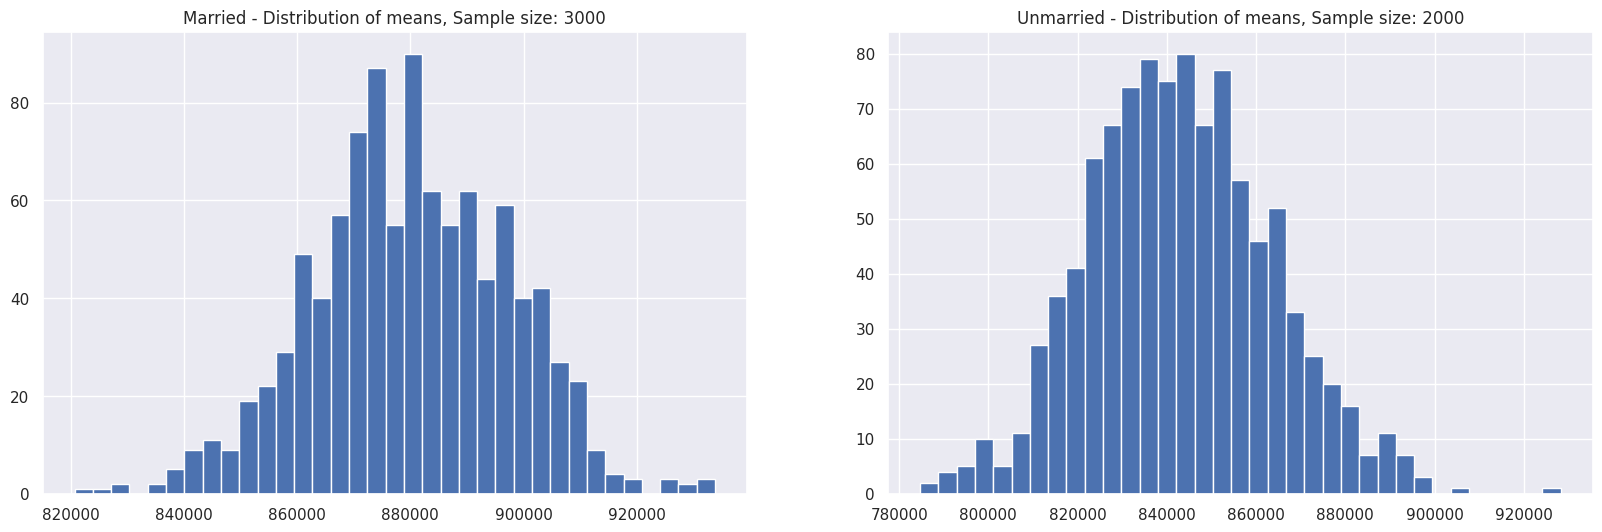

Population mean - Mean of sample means of amount spend for Married: 880114.04
Population mean - Mean of sample means of amount spend for Unmarried: 843020.98

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [ ]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==0].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==1].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

In [ ]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


#Insight:

#When 95% confience Interval,

#Average amount spend by married customer will lie in between: (806668.83, 880384.76)
#Average amount spend by unmarried customer will lie in between: (848741.18, 912410.38)

##Confiednce Interval on Age

In [ ]:
age_df = walmart_df.copy()
age_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
age_df = age_df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
age_df = age_df.reset_index()
age_df.head()

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001


In [ ]:
age_df['Age'].value_counts()

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64

In [ ]:
for val in ['26-35', '36-45', '18-25', '36-50', '51+', '0-17']:

    new_df = age_df[age_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 36-50 --> confidence interval of means: (nan, nan)
For age 51+ --> confidence interval of means: (nan, nan)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


#Insight:

#When 95% confidence Interval on Age,

# 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)

# Average amount spent by 26-35 will lie in between (945034.42, 1034284.21)
# Average amount spent by 36-45 will lie in between (823347.80, 935983.62)
# Average amount spent by 18-25 will lie in between (801632.78, 908093.46)
# Average amount spent by 46-50 will lie in between (713505.63, 871591.93)
# Average amount spent by 51-55 will lie in between (692392.43, 834009.42)
# Average amount spent by 55+ will lie in between (476948.26, 602446.23)
# Average amount spent by 0-17 will lie in between (527662.46, 710073.17)


#Correlation Analysis

In [ ]:
df['Occupation'] = df['Occupation'].astype('int64')


In [ ]:
df['Product_Category'] = df['Product_Category'].astype('int64')

In [ ]:
cor_df = df.select_dtypes(include='number')
cor_df

,Occupation,Product_Category,Purchase
0,10,3,8370
1,10,1,15200
2,10,12,1422
3,10,12,1057
4,16,8,7969
...,...,...,...
550063,13,20,368
550064,1,20,371
550065,15,20,137
550066,1,20,365


In [ ]:
cor_df.corr()

,Occupation,Product_Category,Purchase
Occupation,1.000000,-0.007618,0.020833
Product_Category,-0.007618,1.000000,-0.343703
Purchase,0.020833,-0.343703,1.000000


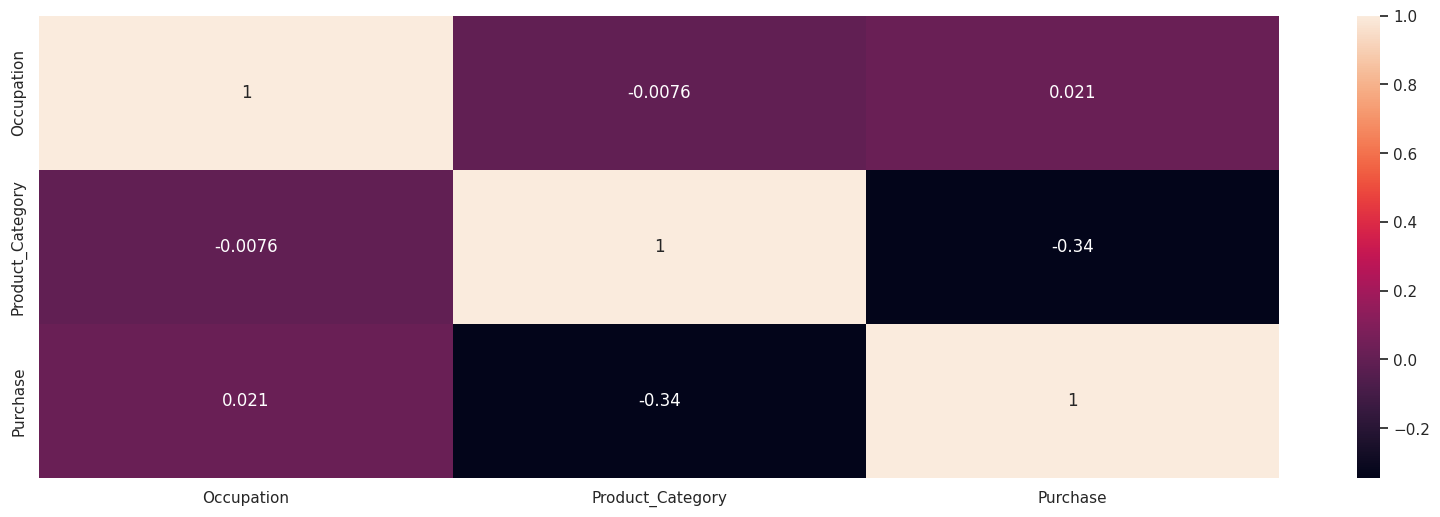

In [ ]:
plt.subplots(figsize=(20,6))
sns.heatmap(cor_df.corr(),annot=True)
plt.show()

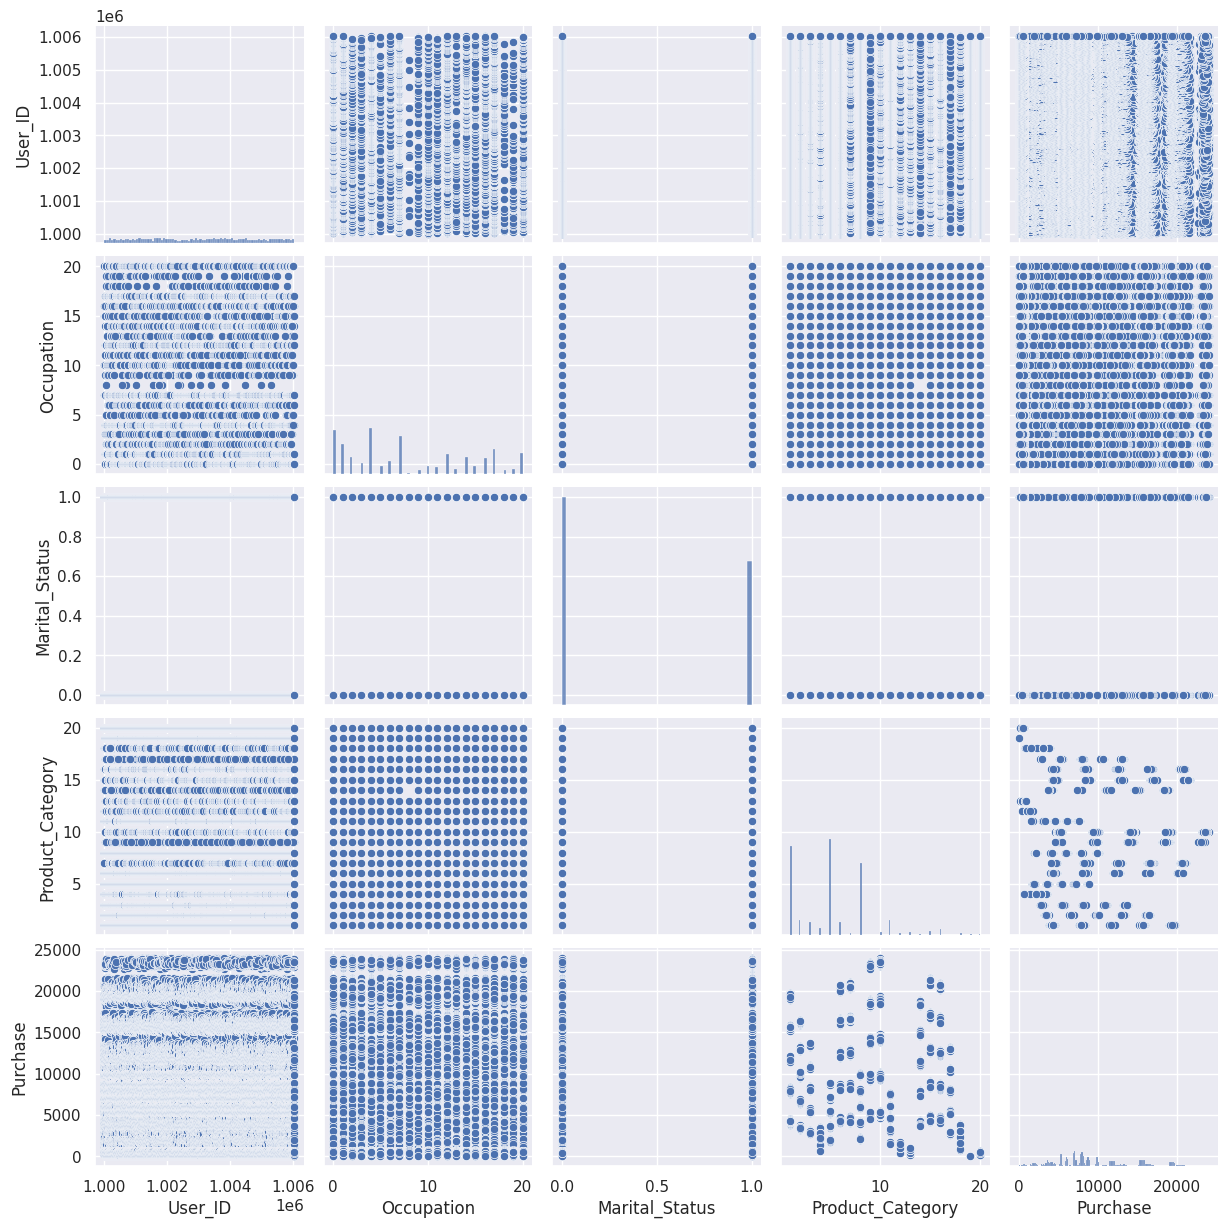

In [ ]:
sns.pairplot(walmart_df)

#Recommendations:

#Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

#Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

#Customers in the age 18-50 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-50

#Male customers living in City_Category B spend more money than other male customers living in A or C, Selling more products in the City_Category A and C will help the company increase the revenue.

#The management should have some offers on kids (0-17 years) in order to increase sales.

#In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

